<a href="https://colab.research.google.com/github/J-N-ch/RL_MAZE_Sarsa/blob/master/RL_maze_Sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Modification from "https://github.com/YutaroOgawa/Deep-Reinforcement-Learning-Book/blob/master/program/2_2_maze_random.ipynb"
'''

 Add Using Policy Gradient !!!

'''

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

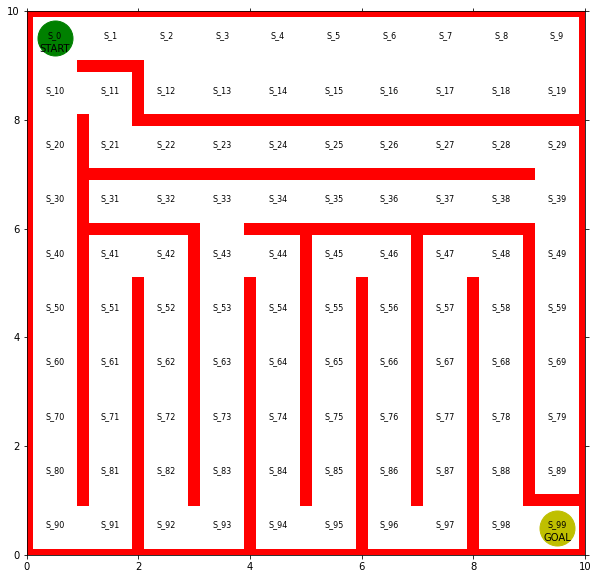

In [5]:
# Initialize State of Maze

# Set the size of the Graph
fig = plt.figure( figsize=(10, 10) )
ax  = plt.gca()

# Draw the Red Wall
# [x1, y1] ---> [x2, y2]
#plt.plot([x1, x2], [y1, y2], color='red', linewidth=2)
lwd=12
plt.plot([  0, 0 ], [  0, 10 ], color='red', linewidth=lwd)
plt.plot([  0,10 ], [ 10, 10 ], color='red', linewidth=lwd)
plt.plot([ 10,10 ], [ 10,  0 ], color='red', linewidth=lwd)
plt.plot([ 10, 0 ], [  0,  0 ], color='red', linewidth=lwd)

plt.plot([1, 1    ], [ 1,     1 + 7], color='red', linewidth=lwd)
plt.plot([1, 2    ], [ 2 + 7, 2 + 7], color='red', linewidth=lwd)
plt.plot([2, 2    ], [ 2 + 7, 1 + 7], color='red', linewidth=lwd)
plt.plot([2, 3 + 7], [ 1 + 7, 1 + 7], color='red', linewidth=lwd)
plt.plot([1, 3    ], [-1 + 7,-1 + 7], color='red', linewidth=lwd)
plt.plot([4, 9    ], [-1 + 7,-1 + 7], color='red', linewidth=lwd)
plt.plot([1, 9    ], [ 0 + 7, 0 + 7], color='red', linewidth=lwd)
plt.plot([2, 2    ], [ 0,    -2 + 7], color='red', linewidth=lwd)
plt.plot([3, 3    ], [ 1,    -1 + 7], color='red', linewidth=lwd)
plt.plot([4, 4    ], [ 0,    -2 + 7], color='red', linewidth=lwd)
plt.plot([5, 5    ], [ 1,    -1 + 7], color='red', linewidth=lwd)
plt.plot([6, 6    ], [ 0,    -2 + 7], color='red', linewidth=lwd)
plt.plot([7, 7    ], [ 1,    -1 + 7], color='red', linewidth=lwd)
plt.plot([8, 8    ], [ 0,    -2 + 7], color='red', linewidth=lwd)
plt.plot([9, 9    ], [ 1,    -1 + 7], color='red', linewidth=lwd)
#plt.plot([3, 4    ], [ 5,     5    ], color='red', linewidth=lwd)
plt.plot([9, 10   ], [ 1,     1    ], color='red', linewidth=lwd)


# Draw the text to represent state of agent in the maze
def plot_fun(i,j):
    plt.text(i+0.5, (9-j)+0.5, 'S_{}'.format(i + j*10), size=8, ha='center')

[[plot_fun(i,j) for i in range(10)] for j in range(10)]

# Set the range of the graph
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.tick_params(axis='both',
                which='both',
                bottom='off',
                top='off',
                labelbottom='off',
                right='off',
                left='off',
                labelleft='off',
                )

# Draw it!
start_x, start_y = [1 - 0.5, 10 - 0.5]
plt.text(start_x, start_y - 0.25, 'START', ha='center')
plt.text(start_y, start_x - 0.25,  'GOAL', ha='center')
line, =ax.plot([start_x], [start_y], marker="o", color='g', markersize=35)
line, =ax.plot([start_y], [start_x], marker="o", color='y', markersize=35)


In [6]:
# Set the Strategy parameters theta_0 (The Strategy Table)
N = np.nan
#                 up, right, down, left
theta_0_row9 = np.array([
                    [ N, 1, 1, N],# S_0
                    [ N, 1, N, 1],# S_1
                    [ N, 1, 1, 1],# S_2
                    [ N, 1, 1, 1],# S_3
                    [ N, 1, 1, 1],# S_4
                    [ N, 1, 1, 1],# S_5
                    [ N, 1, 1, 1],# S_6
                    [ N, 1, 1, 1],# S_7
                    [ N, 1, 1, 1],# S_8
                    [ N, N, 1, 1],# S_9
                   ])

theta_0_row8 = np.array([
                    [ 1, 1, 1, N],# S_10
                    [ N, N, 1, 1],# S_11
                    [ 1, 1, N, N],# S_12
                    [ 1, 1, N, 1],# S_13
                    [ 1, 1, N, 1],# S_14
                    [ 1, 1, N, 1],# S_15
                    [ 1, 1, N, 1],# S_16
                    [ 1, 1, N, 1],# S_17
                    [ 1, 1, N, 1],# S_18
                    [ 1, N, N, 1],# S_19
                   ])

theta_0_row7 = np.array([
                    [ 1, N, 1, N],# S_20
                    [ 1, 1, N, N],# S_21
                    [ N, 1, N, 1],# S_22
                    [ N, 1, N, 1],# S_23
                    [ N, 1, N, 1],# S_24
                    [ N, 1, N, 1],# S_25
                    [ N, 1, N, 1],# S_26
                    [ N, 1, N, 1],# S_27
                    [ N, 1, N, 1],# S_28
                    [ N, N, 1, 1],# S_29
                   ])

theta_0_row6 = np.array([
                    [ 1, N, 1, N],# S_30
                    [ N, 1, N, N],# S_31
                    [ N, 1, N, 1],# S_32
                    [ N, 1, 1, 1],# S_33
                    [ N, 1, N, 1],# S_34
                    [ N, 1, N, 1],# S_35
                    [ N, 1, N, 1],# S_36
                    [ N, 1, N, 1],# S_37
                    [ N, 1, N, 1],# S_38
                    [ 1, N, 1, 1],# S_39
                   ])

theta_0_row5 = np.array([
                    [ 1, N, 1, N],# S_40
                    [ N, 1, 1, N],# S_41
                    [ N, N, 1, 1],# S_42
                    [ 1, 1, 1, N],# S_43
                    [ N, N, 1, 1],# S_44
                    [ N, 1, 1, N],# S_45
                    [ N, N, 1, 1],# S_46
                    [ N, 1, 1, N],# S_47
                    [ N, N, 1, 1],# S_48
                    [ 1, N, 1, N],# S_49
                   ])

theta_0_row4 = np.array([
                    [ 1, N, 1, N],# S_50
                    [ 1, N, 1, N],# S_51
                    [ 1, N, 1, N],# S_52
                    [ 1, N, 1, N],# S_53
                    [ 1, N, 1, N],# S_54
                    [ 1, N, 1, N],# S_55
                    [ 1, N, 1, N],# S_56
                    [ 1, N, 1, N],# S_57
                    [ 1, N, 1, N],# S_58
                    [ 1, N, 1, N],# S_59
                   ])

theta_0_row3 = np.array([
                    [ 1, N, 1, N],# S_60
                    [ 1, N, 1, N],# S_61
                    [ 1, N, 1, N],# S_62
                    [ 1, N, 1, N],# S_63
                    [ 1, N, 1, N],# S_64
                    [ 1, N, 1, N],# S_65
                    [ 1, N, 1, N],# S_66
                    [ 1, N, 1, N],# S_67
                    [ 1, N, 1, N],# S_68
                    [ 1, N, 1, N],# S_69
                   ])

theta_0_row2 = np.array([
                    [ 1, N, 1, N],# S_70
                    [ 1, N, 1, N],# S_71
                    [ 1, N, 1, N],# S_72
                    [ 1, N, 1, N],# S_73
                    [ 1, N, 1, N],# S_74
                    [ 1, N, 1, N],# S_75
                    [ 1, N, 1, N],# S_76
                    [ 1, N, 1, N],# S_77
                    [ 1, N, 1, N],# S_78
                    [ 1, N, 1, N],# S_79
                   ])

theta_0_row1 = np.array([
                    [ 1, N, 1, N],# S_80
                    [ 1, N, 1, N],# S_81
                    [ 1, N, 1, N],# S_82
                    [ 1, N, 1, N],# S_83
                    [ 1, N, 1, N],# S_84
                    [ 1, N, 1, N],# S_85
                    [ 1, N, 1, N],# S_86
                    [ 1, N, 1, N],# S_87
                    [ 1, N, 1, N],# S_88
                    [ 1, N, N, N],# S_89
                   ])

theta_0_row0 = np.array([
                    [ 1, 1, N, N],# S_90
                    [ 1, N, N, 1],# S_91
                    [ 1, 1, N, N],# S_92
                    [ 1, N, N, 1],# S_93
                    [ 1, 1, N, N],# S_94
                    [ 1, N, N, 1],# S_95
                    [ 1, 1, N, N],# S_96
                    [ 1, N, N, 1],# S_97
                    [ 1, 1, N, N],# S_98
                    [ 1, N, N, 1],# S_99
                   ])

theta_0 = np.concatenate([
                    theta_0_row9,
                    theta_0_row8,
                    theta_0_row7,
                    theta_0_row6,
                    theta_0_row5,
                    theta_0_row4,
                    theta_0_row3,
                    theta_0_row2,
                    theta_0_row1,
                    theta_0_row0,
                   ])

#theta_0

In [7]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))

    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)    

In [8]:
# Initialization of the Q-table
[a, b] = theta_0.shape

Q = np.random.rand(a, b) * theta_0


In [9]:
# ε-greedy , method implementatoin.

# Get action
def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    if np.random.rand() < epsilon:
        # Choose the direction according to the probability of pi[s,:]
        next_direction = np.random.choice(direction, p = pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]

    if   next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]

    if   next_direction == "up":
        s_next = s - 10
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 10
    elif next_direction == "left":
        s_next = s - 1

    return s_next


In [10]:
# Sarsaによる行動価値関数Qの更新

def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):

    if s_next == 99:  # ゴールした場合
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

    return Q

In [11]:
# Sarsaで迷路を解く関数の定義、状態と行動の履歴および更新したQを出力


def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # スタート地点
    a = a_next = get_action(s, Q, epsilon, pi)  # 初期の行動
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        a = a_next  # 行動更新

        s_a_history[-1][1] = a
        # 現在の状態（つまり一番最後なのでindex=-1）に行動を代入

        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 次の状態を格納

        s_a_history.append([s_next, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        # 報酬を与え,　次の行動を求めます
        if s_next == 99:
            r = 1  # ゴールにたどり着いたなら報酬を与える
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 次の行動a_nextを求めます。

        # 価値関数を更新
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        # 終了判定
        if s_next == 99:  # ゴール地点なら終了
            break
        else:
            s = s_next

    return [s_a_history, Q]

In [15]:
# Sarsaで迷路を解く

eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1

while is_continue:  # is_continueがFalseになるまで繰り返す
    #print("エピソード:" + str(episode))

    # ε-greedyの値を少しずつ小さくする
    epsilon = epsilon / 2

    # Sarsaで迷路を解き、移動した履歴と更新したQを求める
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    # 状態価値の変化
    new_v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
    #print(np.sum(np.abs(new_v - v)))  # 状態価値の変化を出力
    
    print( str(episode) + " : ", np.sum(np.abs(new_v - v)) ,"\t  The total steps used to finish the maze is " + str(len(s_a_history) - 1) )
    v = new_v

    # 500エピソード繰り返す
    episode = episode + 1
    if episode > 500:
        break

1 :  0.12426811175692884 	  The total steps used to finish the maze is 80
2 :  0.021147129883479672 	  The total steps used to finish the maze is 54
3 :  0.01806868827611452 	  The total steps used to finish the maze is 56
4 :  0.027622415274121917 	  The total steps used to finish the maze is 58
5 :  0.016256733982679027 	  The total steps used to finish the maze is 52
6 :  0.013779527169415544 	  The total steps used to finish the maze is 52
7 :  0.011796148189487918 	  The total steps used to finish the maze is 50
8 :  0.010202401946081024 	  The total steps used to finish the maze is 50
9 :  0.008848130084466704 	  The total steps used to finish the maze is 50
10 :  0.0077313070796390495 	  The total steps used to finish the maze is 50
11 :  0.006814721940845632 	  The total steps used to finish the maze is 50
12 :  0.006314503197846066 	  The total steps used to finish the maze is 50
13 :  0.005921872158184468 	  The total steps used to finish the maze is 50
14 :  0.00567372639242